In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
%config InlineBackend.figure_format = 'retina'

# Groupby

- split-apply-combine 접근

#  데이터 로드
- 가상의 매출 정보

In [3]:
order_leads = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/order_leads.csv',
    parse_dates = [3]
)
sales_team = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/sales_team.csv',
    parse_dates = [3]
)

In [9]:
print(order_leads.shape)
order_leads[:10]

(100000, 6)


,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0
5,CQKV2CTU29CVIBV7,D0AUXPP07H6AVSGD,Melancholy Social-Role,2015-07-16,1304,0
6,7V1CDIHQAPCGRJZ2,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-12-17,4610,0
7,JFMNRRRNS5MD8BKQ,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-02-27,8349,1
8,8NAXO48R22240WYE,D0AUXPP07H6AVSGD,Melancholy Social-Role,2015-12-23,4881,0
9,FNY1AMVZH2OGPTK6,D0AUXPP07H6AVSGD,Melancholy Social-Role,2015-03-03,9606,0


In [10]:
print(sales_team.shape)
sales_team[:10]

(4619, 4)


,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3
5,William Taylor,ZTZA0ZLYZR85PTUJ,Off-Beat Anthea,6NHGP9YC7CTBARBG
6,William Taylor,ZTZA0ZLYZR85PTUJ,Pearl-Gray Midstream,JSG0N4TPIDMQOR4A
7,William Taylor,ZTZA0ZLYZR85PTUJ,Unaggressive Quality,AJ4EWVZKZGX0KBC9
8,William Taylor,ZTZA0ZLYZR85PTUJ,Astral Circumference,ZVKRKS0N8FAMWU8C
9,William Taylor,ZTZA0ZLYZR85PTUJ,Greasy Transitions,CLSTQXCAABBWSQ8K


In [11]:
df = pd.merge(order_leads,sales_team,on=['Company Id','Company Name'])
print(df.shape)
df[:10]

(100000, 8)


,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
5,CQKV2CTU29CVIBV7,D0AUXPP07H6AVSGD,Melancholy Social-Role,2015-07-16,1304,0,William Taylor,ZTZA0ZLYZR85PTUJ
6,7V1CDIHQAPCGRJZ2,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-12-17,4610,0,William Taylor,ZTZA0ZLYZR85PTUJ
7,JFMNRRRNS5MD8BKQ,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-02-27,8349,1,William Taylor,ZTZA0ZLYZR85PTUJ
8,8NAXO48R22240WYE,D0AUXPP07H6AVSGD,Melancholy Social-Role,2015-12-23,4881,0,William Taylor,ZTZA0ZLYZR85PTUJ
9,FNY1AMVZH2OGPTK6,D0AUXPP07H6AVSGD,Melancholy Social-Role,2015-03-03,9606,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [12]:
# 컬럼 이름 변경
df = df.rename(columns={'Order Value':'Val','Converted':'Sale'})
df[:2]

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ


# Groupby
- 조건/컬럼에 따라 데이터를 그룹으로 나눈다

## groupby sales rep
- 먼저 grouped DataFrame을 만든다. 즉 데이터셋을 나눈다

In [13]:
grouped = df.groupby('Sales Rep')
grouped

In [14]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

### 모든 그룹 보기
- 그룹 객체에 `groups`를 사용하면 각 그룹을 구분하는 인덱스들을 얻는다

In [15]:
grouped.groups

{'Aaron Hendrickson': Int64Index([25612, 25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620,
             25621,
             ...
             25894, 25895, 25896, 25897, 25898, 25899, 25900, 25901, 25902,
             25903],
            dtype='int64', length=292),
 'Adam Sawyer': Int64Index([67140, 67141, 67142, 67143, 67144, 67145, 67146, 67147, 67148,
             67149,
             ...
             67454, 67455, 67456, 67457, 67458, 67459, 67460, 67461, 67462,
             67463],
            dtype='int64', length=324),
 'Adele Kimmel': Int64Index([90915, 90916, 90917, 90918, 90919, 90920, 90921, 90922, 90923,
             90924,
             ...
             91020, 91021, 91022, 91023, 91024, 91025, 91026, 91027, 91028,
             91029],
            dtype='int64', length=115),
 'Adrian Daugherty': Int64Index([31483, 31484, 31485, 31486, 31487, 31488, 31489, 31490, 31491,
             31492,
             ...
             31842, 31843, 31844, 31845, 31846, 31847, 31848, 318

In [17]:
type(grouped.groups)

dict

### 특정 그룹 선택

In [23]:
df['Sales Rep'].nunique()

499

In [21]:
df['Sales Rep'].unique()

array(['William Taylor', 'Willie Rau', 'Sam Rhodes', 'Alvin Jenson',
       'Helen Payne', 'Michael Conner', 'Leta Allen', 'Linda Grandy',
       'Calvin Mukai', 'Gail Roach', 'Norman Mccaffrey', 'Arlene Collier',
       'Kent Thomason', 'Gary Castle', 'Evelyn Torres', 'Polly Hope',
       'Cynthia Winstead', 'Adrianna Shelton', 'Frank Murry',
       'Jessica Oakley', 'Grant Spilman', 'Teddy Cook',
       'Beatrice Mccormick', 'Katie Rodriquez', 'David Saathoff',
       'John Galindo', 'Edward Morano', 'Flora Mcintyre', 'Juan Thomas',
       'Sandra Carr', 'Terry Thurman', 'Doris Newton',
       'Kimberly Caviness', 'Robert Donaldson', 'Barbara Tallent',
       'Julio Woodard', 'Barbara Eaton', 'Leslie Mason', 'Eric Dixon',
       'Constance Baker', 'Therese Sanchez', 'Olga Camp', 'Mary Whatley',
       'Patrick Turner', 'Kimberly Robinson', 'Donna Mandy',
       'Brian Dagley', 'Patricia Lebowitz', 'Michael Bishop',
       'Christine Toler', 'Stephanie Hull', 'Viola Ates', 'Helen Youn

In [18]:
grouped.get_group('Aaron Hendrickson')

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
25612,3BJY12LWBN7D0GJL,CE4544HJOFMONMH2,Follow-Up Boundary,2014-09-04,1940,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25613,W3HHOSC1H6A1PW37,CE4544HJOFMONMH2,Follow-Up Boundary,2015-09-24,2109,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25614,G9JKIZO4WD945GBH,CE4544HJOFMONMH2,Follow-Up Boundary,2014-12-06,4300,1,Aaron Hendrickson,AEMLQ09IYM72ACBL
25615,BKIJVKZ7REVN6P8B,CE4544HJOFMONMH2,Follow-Up Boundary,2017-05-07,3026,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25616,WFHGWR4PAD04A2GJ,CE4544HJOFMONMH2,Follow-Up Boundary,2016-01-20,5033,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
...,...,...,...,...,...,...,...,...
25899,NATK7K3TZUH32BBE,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2015-01-27,6095,1,Aaron Hendrickson,AEMLQ09IYM72ACBL
25900,EGD6IRB0UML62XB0,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2018-11-04,7652,1,Aaron Hendrickson,AEMLQ09IYM72ACBL
25901,9Z18A7D1T8EUH58D,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2016-05-08,4746,0,Aaron Hendrickson,AEMLQ09IYM72ACBL
25902,R0LUW64V2F3O2HSD,CGDGXAW6GNU6JIEG,Fiftieth Art'S,2017-02-16,6158,0,Aaron Hendrickson,AEMLQ09IYM72ACBL


### 그룹의 갯수 세기, size()

In [24]:
grouped.size()

Sales Rep
Aaron Hendrickson    292
Adam Sawyer          324
Adele Kimmel         115
Adrian Daugherty     369
Adrianna Shelton      37
                    ... 
Willie Lin            44
Willie Rau            95
Willie Sanchez       309
Yvonne Jones          74
Yvonne Lindsey        67
Length: 499, dtype: int64

In [25]:
grouped.size().sum()

100000

In [26]:
grouped.size().to_frame()

,0
Sales Rep,
Aaron Hendrickson,292
Adam Sawyer,324
Adele Kimmel,115
Adrian Daugherty,369
Adrianna Shelton,37
...,...
Willie Lin,44
Willie Rau,95
Willie Sanchez,309


### 이름으로 그루핑하기 (first name)
- 499 행이 318개로 줄었다

In [27]:
df.groupby(
    df['Sales Rep'].str.split(' ').str[0]
).size()

Sales Rep
Aaron        292
Adam         324
Adele        115
Adrian       369
Adrianna      37
            ... 
Wesley       144
Wilbert      213
William     1393
Willie       448
Yvonne       141
Length: 318, dtype: int64

### 이름중에 "William" 이 있는지를 세기

In [28]:
df.groupby(
    df['Sales Rep'].apply(lambda x: 'William' in x)
).size()

Sales Rep
False    97111
True      2889
dtype: int64

### 그룹을 랜덤하게 5개로 나누기 (A~E)

In [29]:
df.groupby(
    pd.Series(np.random.choice(list('ABCDG'),len(df)))
).size()

A    20015
B    19921
C    19950
D    20077
G    20037
dtype: int64

### Order Value에 따라 3개 등급 나누기

In [30]:
# qcut bins the passed Series into q evenly sized parts (and labels the bins)
df.groupby(
    pd.qcut(x=df['Val'],q=3,labels=['low','mid','high'])
).size()

Val
low     33339
mid     33336
high    33325
dtype: int64

### 지정된 Order Value 간격으로 나누기

In [31]:
# cut bins the passed Series into defined bins
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).size()

Val
(0, 3000]        29220
(3000, 5000]     19892
(5000, 7000]     20359
(7000, 10000]    30529
dtype: int64

## `pd.Grouper`
- 다른 날짜/시간 으로 그루핑하는 것

### 연도로 나누기

In [32]:
df.groupby(pd.Grouper(key='Date',freq='Y')).size()

Date
2014-12-31    19956
2015-12-31    20054
2016-12-31    20133
2017-12-31    20079
2018-12-31    19778
Freq: A-DEC, dtype: int64

### 분기로 나누기

In [552]:
# SM
df.groupby(pd.Grouper(key='Date',freq='SM')).size()

Date
2013-12-31    761
2014-01-15    837
2014-01-31    820
2014-02-15    740
2014-02-28    817
             ... 
2018-10-31    810
2018-11-15    805
2018-11-30    824
2018-12-15    837
2018-12-31     50
Freq: SM-15, Length: 121, dtype: int64

### 여러 컬럼으로 그루핑

In [33]:
df.groupby(['Sales Rep','Company Name']).size()

Sales Rep          Company Name               
Aaron Hendrickson  6-Foot Homosexuals             20
                   63D House'S                    27
                   Angular Liberalism             28
                   Boon Blish'S                   18
                   Business-Like Structures       21
                                                  ..
Yvonne Jones       Entry-Limiting Westinghouse    20
                   Intractable Fairgoers          18
                   Smarter Java                   17
Yvonne Lindsey     Meretricious Fabrication       28
                   Shrill Co-Op                   39
Length: 4619, dtype: int64

# 함수 적용 (apply)

- 생성된 그룹에 대해 어떤 함수를 적용하여 결과를 얻는다
- 다음의 사용법을 배운다

1. apply,
2. agg(regate),
3. transform, 
4. filter,  


- 평범한, 일반적인 사용예

`group = df.groupby('GROUP')` and then:
- `group.apply(mean)`
- `group.agg(mean)`
- `group['INTERSTING COLUMN'].apply(mean)`
- `group.agg({'INTERSTING COLUMN':mean})`
- `group.mean()`

여기서 `mean`은 임의의 함수로 바꿀 수 있다


###  `apply`

In [34]:
_ = pd.DataFrame(
    np.random.random((2,6)),
    columns=list('ABCDEF')
)
_

,A,B,C,D,E,F
0,0.326802,0.329098,0.473851,0.536585,0.40404,0.019936
1,0.719241,0.676180,0.815746,0.310098,0.21157,0.020996


In [35]:
_.apply(sum, axis=0) # axis=0 is default, so you can drop that

A    1.046043
B    1.005278
C    1.289597
D    0.846684
E    0.615610
F    0.040933
dtype: float64

In [36]:
_.apply(sum, axis=1)

0    2.090312
1    2.753831
dtype: float64

- 각 그룹을 작은 데이터프레임이라고 보면 된다
- `agg(regation)` 그룹을 합치는 방법

In [37]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Sale'].apply(sum)

Date
2014-12-31    3681
2015-12-31    3800
2016-12-31    3881
2017-12-31    3068
2018-12-31    2478
Freq: A-DEC, Name: Sale, dtype: int64

In [38]:
# 계산 대상을 지정
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum)

/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Val,Sale
Date,,
2014-12-31,100422394,3681
2015-12-31,101724648,3800
2016-12-31,101789642,3881
2017-12-31,101957784,3068
2018-12-31,100399962,2478


In [39]:
# 클립보드에 저장하기
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum).to_clipboard(sep=' ')

/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


- 아래와 같이 붙여넣기를 할 수 있다

Date Val Sale  
2014-12-31 100422394 3681  
2015-12-31 101724648 3800  
2016-12-31 101789642 3881  
2017-12-31 101957784 3068  
2018-12-31 100399962 2478  
  

# `agg(regate)`

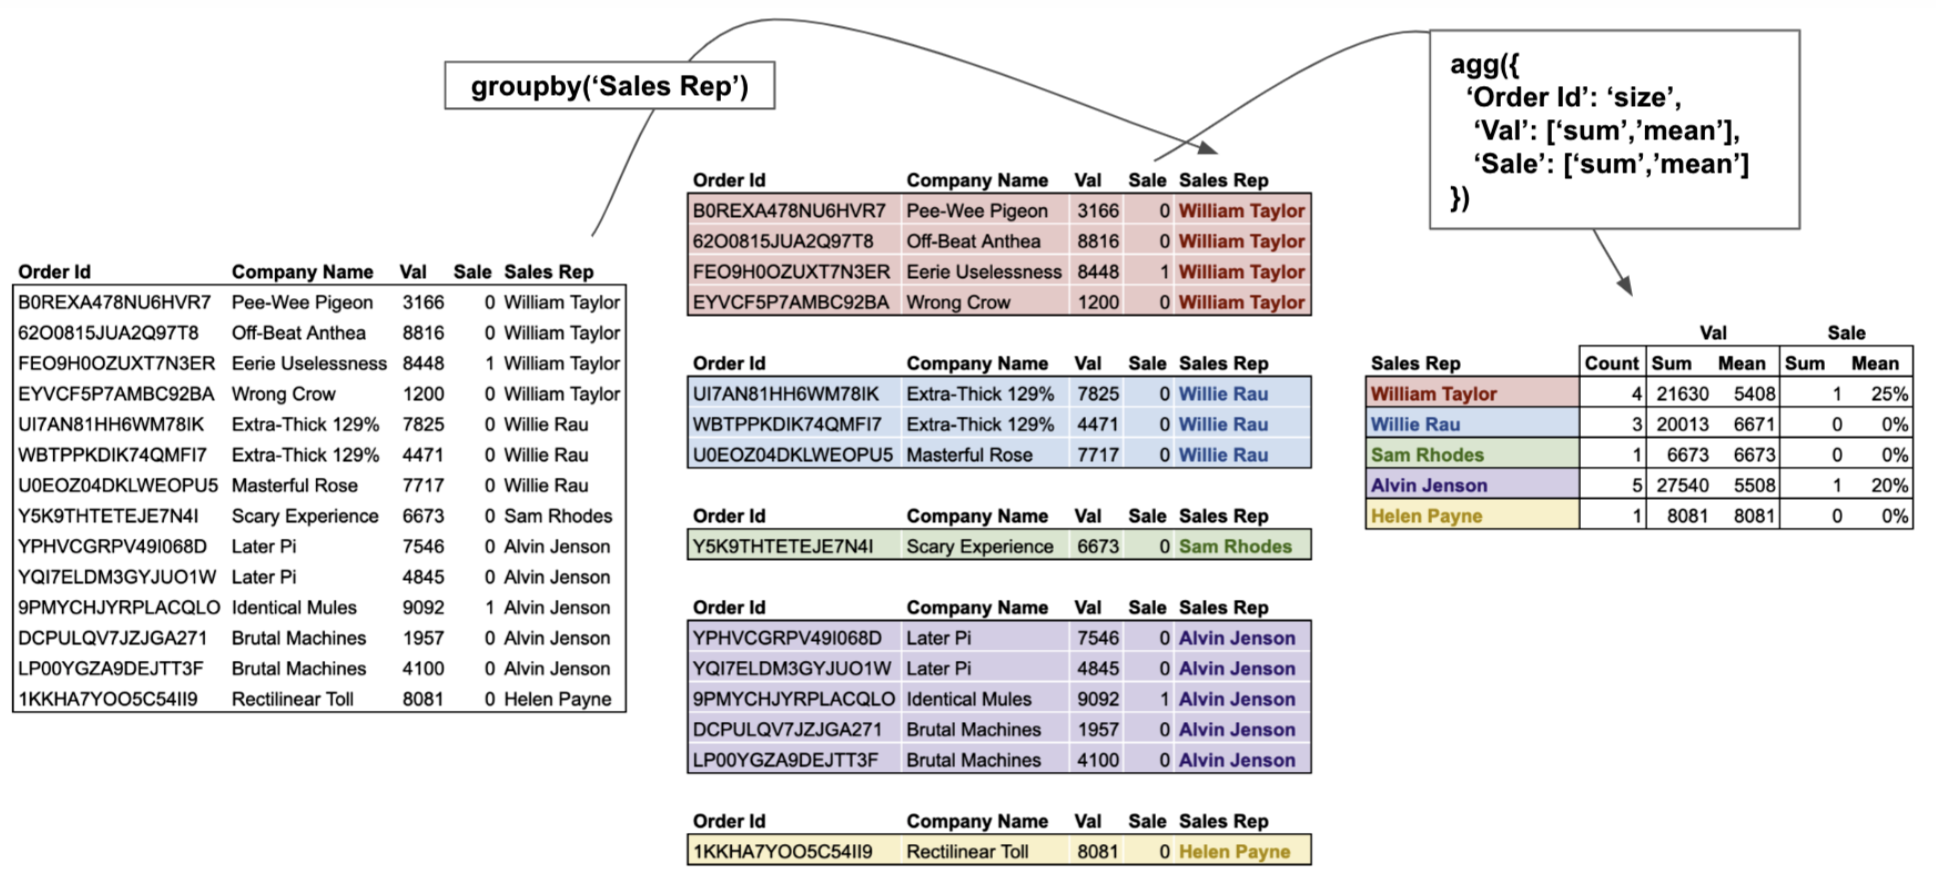

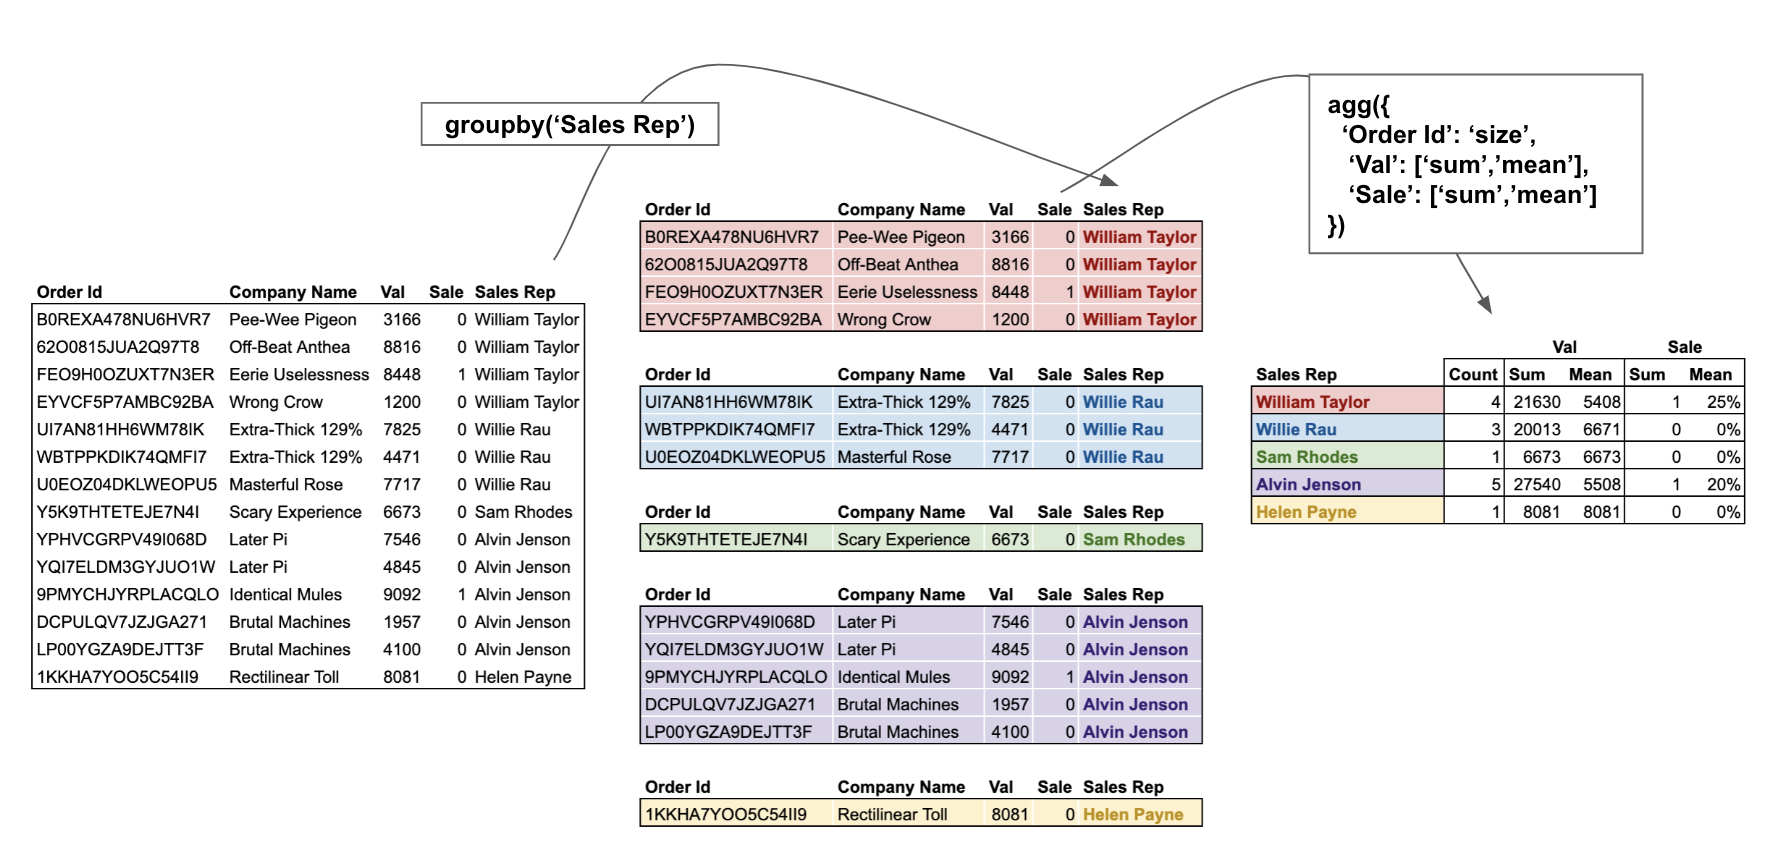

In [561]:
Image(filename='groupby-agg.png') 

In [40]:
# agg(regation)
df.groupby('Sales Rep').agg({
    'Order Id':'size',
    'Val':['sum','mean'],
    'Sale':['sum','mean'] })

Order Id      Val              Sale          
                      size      sum         mean  sum      mean
Sales Rep                                                      
Aaron Hendrickson      292  1550608  5310.301370   46  0.157534
Adam Sawyer            324  1587828  4900.703704   48  0.148148
Adele Kimmel           115   527339  4585.556522   20  0.173913
Adrian Daugherty       369  1841274  4989.902439   51  0.138211
Adrianna Shelton        37   186651  5044.621622    8  0.216216
...                    ...      ...          ...  ...       ...
Willie Lin              44   254128  5775.636364    6  0.136364
Willie Rau              95   434918  4578.084211   19  0.200000
Willie Sanchez         309  1525229  4936.016181   52  0.168285
Yvonne Jones            74   416388  5626.864865   12  0.162162
Yvonne Lindsey          67   324334  4840.805970   18  0.268657

[499 rows x 5 columns]

In [44]:
def cr(x):
    return round(np.mean(x),2)

aggregation = {
    'Potential Sales':('Val','size'),
    'Sales':('Sale','sum'),
    'Conversion Rate':('Sale',cr)
}

df.groupby('Sales Rep').agg(**aggregation)

,Potential Sales,Sales,Conversion Rate
Sales Rep,,,
Aaron Hendrickson,292,46,0.16
Adam Sawyer,324,48,0.15
Adele Kimmel,115,20,0.17
Adrian Daugherty,369,51,0.14
Adrianna Shelton,37,8,0.22
...,...,...,...
Willie Lin,44,6,0.14
Willie Rau,95,19,0.20
Willie Sanchez,309,52,0.17


In [46]:
def cr(x):
    return round(np.mean(x),2)

P = df.groupby('Sales Rep').agg({
    'Val':'size',
    'Sale':['sum',cr]
})

P.columns = ['Potential Sales','Sales','Conversion Rate']
P

,Potential Sales,Sales,Conversion Rate
Sales Rep,,,
Aaron Hendrickson,292,46,0.16
Adam Sawyer,324,48,0.15
Adele Kimmel,115,20,0.17
Adrian Daugherty,369,51,0.14
Adrianna Shelton,37,8,0.22
...,...,...,...
Willie Lin,44,6,0.14
Willie Rau,95,19,0.20
Willie Sanchez,309,52,0.17


## Transform

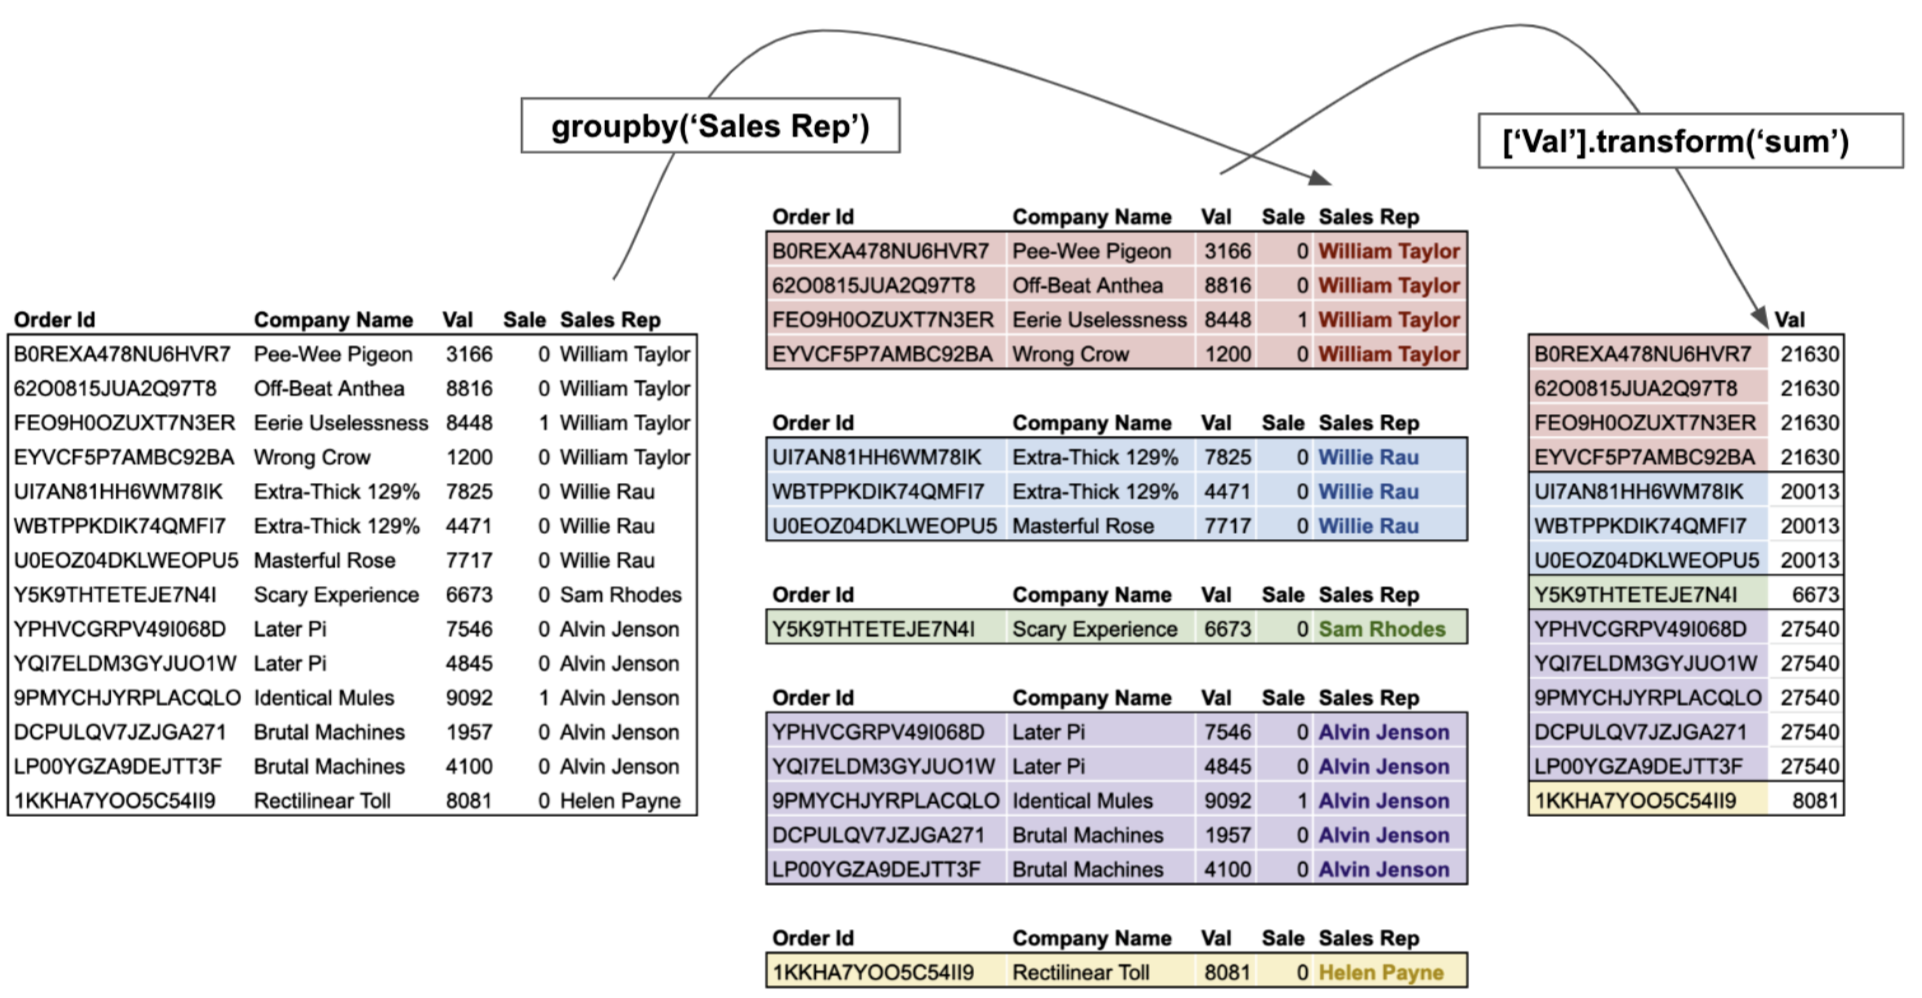

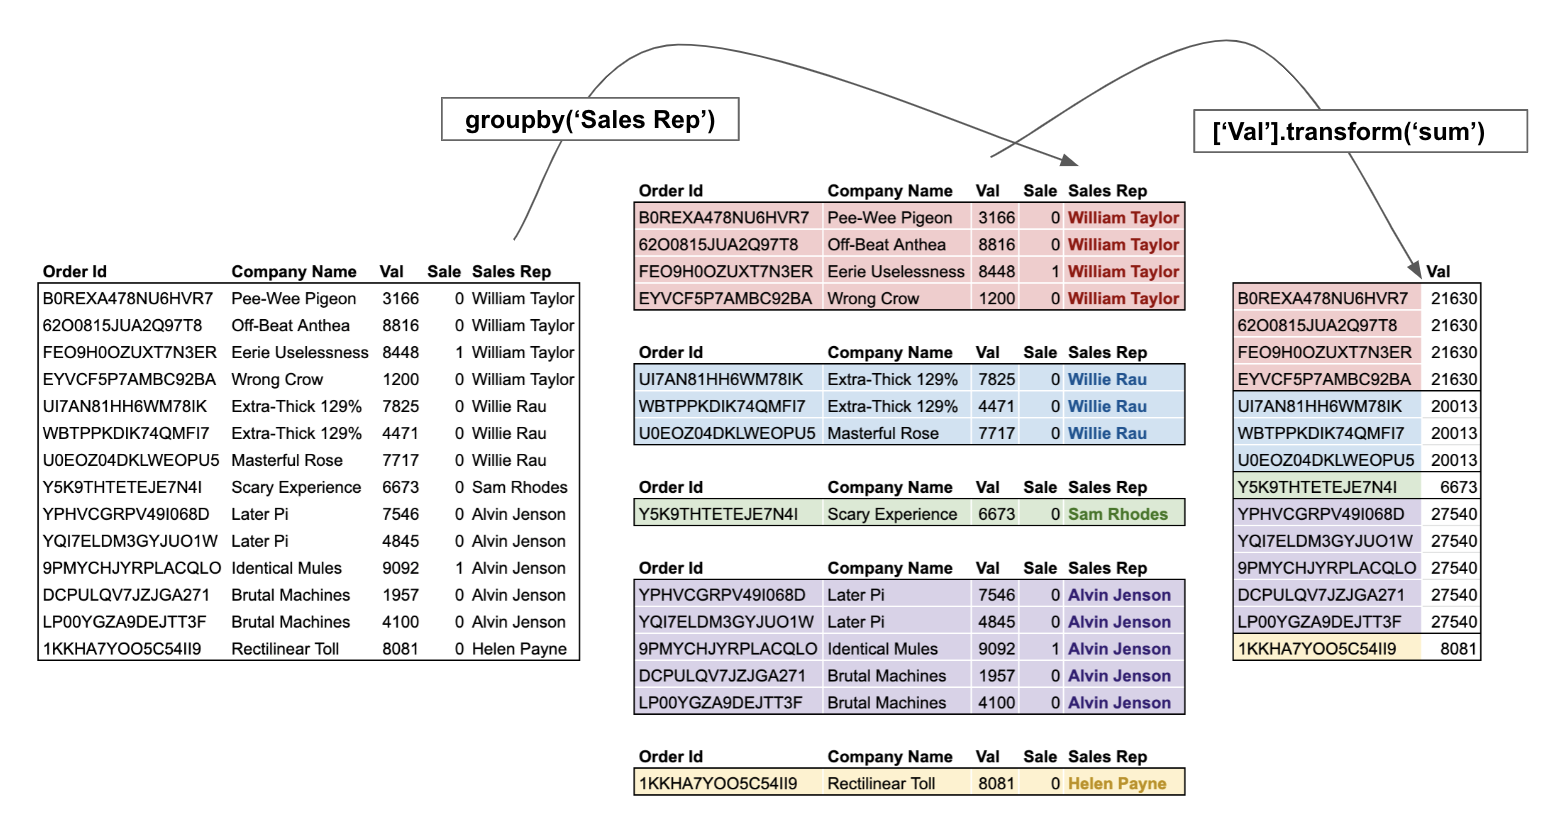

In [567]:
Image(filename='groupby-transform.png') 

In [49]:
df.groupby('Sales Rep')['Val'].transform(lambda x: x/sum(x))

0        0.004991
1        0.005693
2        0.003976
3        0.000799
4        0.003300
           ...   
99995    0.012088
99996    0.000711
99997    0.013741
99998    0.010695
99999    0.001533
Name: Val, Length: 100000, dtype: float64

In [60]:
df['%'] = df.groupby('Sales Rep')['Val'].transform(
  lambda x: x/sum(x))
df[:3]

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id,%
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ,0.004991
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ,0.005693
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ,0.003976
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ,0.000799
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ,0.003300
...,...,...,...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0,Ida Woodward,LF3CPWWZKSNB1AXI,0.012088
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1,Ida Woodward,LF3CPWWZKSNB1AXI,0.000711
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0,Ida Woodward,LF3CPWWZKSNB1AXI,0.013741
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0,Ida Woodward,LF3CPWWZKSNB1AXI,0.010695


In [61]:
del df['%']
df[:3]

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ


In [65]:
# filter (at least 200k in sales)
P=df.groupby('Sales Rep').filter(lambda x: (x['Val'] * x['Sale']).sum() > 200000)
P[:5]

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [64]:
P.shape

(68313, 8)

In [66]:
# Let's add this for verification
df['cr'] = df.groupby('Sales Rep')['Sale'].transform('mean')

df.groupby('Sales Rep').filter(lambda x: x['Sale'].mean() > .3)

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id,cr
3897,4MWBSVADRWSNLBA0,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2014-03-17,2637,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3898,8C13U50FF5ZKU1TJ,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2015-10-26,9495,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3899,D6Y3HVKNT480ADL1,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2017-12-09,9156,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3900,JXO5XMLWEDZKLGCG,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2016-07-05,1219,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
3901,37PVLZLXMXRCZLNK,4D9PJORE7YYNDV2E,Qualitative Asimov'S,2018-03-07,4374,0,Teddy Cook,36I1D97CG4V8ATKV,0.315789
...,...,...,...,...,...,...,...,...,...
94627,H72B7571AMUFAH2A,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2015-08-07,2764,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94628,SFQVIH3PNXVLR7PM,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2014-11-28,1008,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94629,B4GFG6BPT1HOHJOU,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2018-06-27,8999,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348
94630,7ZO3XQ1C3U3BOM6T,JQ7DP9EX0HY1OKRU,Road-Shy Small-Town,2015-02-19,2079,0,Jennifer Peck,UTJ4LM946FZQSCN1,0.304348


In [67]:
del df['cr']

# agg 고급 예제

In [68]:
# Grouping by 3 evenly cut "Order Value" buckets
df.groupby(
    pd.qcut(df['Val'],3,['low','mid','high'])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

Val              Sale       
             mean         std   sum   size
Val                                       
low   1759.218063  955.198008  5653  33339
mid   5078.456234  957.488032  5577  33336
high  8352.541395  945.261300  5678  33325

In [69]:
# Grouping by cutom "Order Value" buckets
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

Val              Sale       
                      mean         std   sum   size
Val                                                
(0, 3000]      1555.837474  839.194392  4913  29220
(3000, 5000]   3998.367283  579.842580  3389  19892
(5000, 7000]   5999.759369  582.543076  3399  20359
(7000, 10000]  8488.592355  868.442376  5207  30529

In [70]:
df.groupby(
    pd.cut(df['Val'],[0,5000,10000],labels=['low','high'])
).agg(
    **{'Conversion Rate':pd.NamedAgg(column='Sale',aggfunc=lambda x: sum(x)/len(x))}
)

,Conversion Rate
Val,
low,0.169042
high,0.169116


In [71]:
# grouping by year and a cut oder value column
df.groupby(
    [pd.Grouper(key='Date',freq='Y'),pd.qcut(df['Val'],3,['low','mid','high'])]
).agg(
    **{'Conversion Rate':pd.NamedAgg(column='Sale',aggfunc=lambda x: sum(x)/len(x))}
).unstack()

Conversion Rate                    
Val                    low       mid      high
Date                                          
2014-12-31        0.185964  0.185123  0.182244
2015-12-31        0.192487  0.184618  0.191403
2016-12-31        0.193346  0.189693  0.195297
2017-12-31        0.151350  0.151591  0.155423
2018-12-31        0.123520  0.124867  0.127470